# Assignment 1 for the course EE-769
## Roll#: 22D0306
### link for recording: https://iitbombay1-my.sharepoint.com/:v:/g/personal/22d0306_iitbombay1_onmicrosoft_com/EVumcQsL4yxAks59LPFhxfQBegf0xF_SfTfE0A4iT5YkJA?e=kpSS9i

### Importing the required libraires 

In [2]:
import numpy as np 
import random 
import matplotlib.pyplot as plt

## 1. Write a function to generate a data matrix X. 
Inputs: Number of samples, feature dimension. 
Output: Data matrix X. [1]

###  This function generates a matrix of integer random numbers between 1 to 1000. The maximum number of samples can be generated from this function is 1000 while you can change the upper limit by modifying the function. 
-The sample in the function refers to the number of samples (N) and the dimension refers to the dimension of feature (D).
the output of this function will be a matrix of X(NxD)

In [3]:
 
def generate(sample,dimension):
    data_X=np.random.randn(sample,dimension)
    return (data_X)


In [4]:
data_X=generate(500,5)
print (data_X,data_X.shape)

[[ 1.21807867e+00 -8.78136927e-01 -1.73506649e+00  1.58969580e+00
   9.01354867e-01]
 [-3.58003166e-01 -9.85039033e-01  2.18461679e-02  1.17450208e+00
   7.05225136e-01]
 [-7.49360558e-02  1.27445294e-01  1.00866665e+00 -1.73891551e-01
  -1.78967621e-01]
 ...
 [ 5.77325565e-01 -6.53682895e-02  6.39998637e-01  2.07773175e+00
   4.51903629e-02]
 [-1.47673367e+00  7.95700822e-01 -1.65337040e-04 -8.17964748e-01
   2.28874291e+00]
 [-2.31590859e-01 -7.57168876e-01 -1.02650958e+00 -4.39289377e-01
   1.91993568e+00]] (500, 5)


# 2. Write a function to generate dependent variable column t.  [1]
a) Inputs: Data matrix X, weight vector for each column, bias w0, noise variance

b) Output: Target vector t

### a. Generating the inputs
The function below takes the number of sample and dimension as input and gerenates the random numbers. According to the number of samples and dimension we can specify if we want to get a matrix of random number or a singel dimensional vector. 

In [4]:
def gen_input(sample,dimension):
    weight1=np.random.rand(1,dimension)
    w0_bias=np.random.rand(1,1)
    v_noise=np.random.randn(sample,1)
    #for normalizing the noise value among different methods I have chosen to divide all the values by
    #the maximum value so the new values of v will me v/max(v)
    v_noise=v_noise/max(v_noise)
    data=np.random.randn(sample, dimension)
    return (weight1,w0_bias,v_noise,data)

In [5]:
w1,bias,noise,X=gen_input(1000,6)
print ("Weight Values\n",w1.shape,
       w1,"\n","Bias value:\n",bias.shape,
       bias,"\n","Noise values :\n",noise.shape,
       noise[0:5,0],"\n","X matrix:\n",X.shape,
       X[0:5,0:4])

Weight Values
 (1, 6) [[0.64539423 0.77605604 0.11902847 0.07519482 0.74512487 0.03706018]] 
 Bias value:
 (1, 1) [[0.59134986]] 
 Noise values :
 (1000, 1) [-0.41653712 -0.0567978   0.11092214 -0.05599268 -0.28324961] 
 X matrix:
 (1000, 6) [[-0.82293785 -0.15201303  0.38640492 -0.10122028]
 [ 0.71297086 -0.85944296 -1.07358667  0.31189588]
 [-0.09413607  0.88828715  0.91039804  0.27836948]
 [-0.93821492  0.81505626  0.51629904 -1.05969622]
 [ 0.2868607   0.98841409 -1.36241645 -0.76484339]]


### b.Function for generating the dependent value t
The function below is for generating the target values using the inputs data, weight values, bias value and noise values. 

In [6]:
def gen_dep(data,weight,bias,noise):
    return ((bias+data.dot(weight.T)+noise))          

In [7]:
target=gen_dep(X,w1,bias,noise)
print (target.shape,target[0:10,0])

(1000, 1) [0.44075174 1.22141974 1.13873639 0.31221324 0.77679901 0.01825442
 0.3735528  1.77210285 0.6439075  0.24243874]


# 3. Write a function to compute a linear regression estimate. 
a) input: data matrix X and weight vector w

b) Output: y

The function below only gets weight, data and bias as inputs and calculate the predicted values. 

In [8]:
def Linear_prediction(data,weight,bias):
    y=bias+weight.dot(data.T)
    return (y.T)
    

In [9]:
y=Linear_prediction(X,w1,bias)
print (y.shape,y[0:10,0])

(1000, 1) [0.85728886 1.27821754 1.02781425 0.36820592 1.06004862 0.04449287
 0.2875385  1.46779009 0.5075067  0.39985779]


# 4. Write a function to compute the mean square error of two vectors y and t. 

Mean square error of predicted and observed values are calculated as: (t-y)^2/N, where "t" is the observed or targeted values and "y" is the predicted values and "N" is the lenght of values. Through out this assignment we will be using the equation mentioned to compute the MSE values. 

In [10]:
def MSE (y,t):
    mean_sq_error=np.sum(np.square(t-y))/t.shape[0]
    return (mean_sq_error)
        

In [11]:
me=MSE(y,target)
print (me)

0.08187484305697595


# 5. Write a function to estimate the weights of linear regression using pseudo-inverse, assuming L2 regularization:
a) input: X, t, and lambda
b) output: w, MSE, y


### Function description:
The function below calculates the weight of a regression problem using pseudo inverse assuming L2 normalization, using the weight caluculated in the first line then the function calculates the predicted value and finally the mse is calculated between the predicted and targeted values. 

***First we will try the function without including the bias (w0) value and then we will try the function including the w0 values and observe the changes. 

In [12]:
def Pinv_w_est (D,t,lamb):
    D_pinv=np.linalg.pinv(lamb*np.identity(D.shape[1])+(D.T@D))
    weight=(D_pinv.dot(D.T@t)).T
    predicted_y=(weight.dot(D.T)).T
    mean_sq_error=MSE(predicted_y,t)
    return (weight,predicted_y,mean_sq_error)


In [13]:
#Finding the weights without bias value (w0).
w,y,mse=Pinv_w_est (X,target,0.01)
print("The weight values:\n",w,"\n",
      "The predicted values\n",y[0:5,:],"\n",
      "The Mean square error\n",mse)
    

The weight values:
 [[0.63470519 0.77651895 0.15855659 0.08653736 0.75580214 0.04548366]] 
 The predicted values
 [[ 0.30597058]
 [ 0.65703126]
 [ 0.48934734]
 [-0.21680362]
 [ 0.41066825]] 
 The Mean square error
 0.42853197322247266


### Including W0
For finding the w0  using pseudo inverse we can add a new column of all ones and then use it for calculating the weight values, the first value of weight vector will w0.

In [14]:
# Including the bias value
XX=np.concatenate([np.ones([X.shape[0],1]),X],axis=1)

In [15]:
w_w0,y,mse=Pinv_w_est (XX,target,0.01)
print("The weight values:\n",w_w0,"\n",
      "The predicted values\n",y[0:8,:],"\n",
      "The Mean square error\n",mse)

The weight values:
 [[0.59027889 0.64656268 0.77985994 0.13890067 0.06848194 0.75650669
  0.02938024]] 
 The predicted values
 [[0.87160234]
 [1.26362225]
 [1.023639  ]
 [0.39251001]
 [1.02572729]
 [0.0235856 ]
 [0.294102  ]
 [1.43900522]] 
 The Mean square error
 0.08120413248579261


# 6. Write a function to compute the gradient of MSE with respect to its weight vector. 

a) Input: X matrix, t vector, and w vector

b) Output: gradient vector

The function below take data matrix, target vector and weight values as input and calculates the gradient of MSE respected to weight. The function first calculates the predicted y and calculates the gradient using the equation:MSE=(t-y)^2/N, y=x*w so, MSE=(t-w*x)^2/N, and dMSE/dw=-2*(t-w*x)(x)/N

In [16]:
def grad_mse(data_input, target, weight):
    y_pred=data_input.dot(weight.T)
    gradient=-2*(X.T@(target-y_pred))/target.shape[0]
    return (gradient)

In [17]:
grad=grad_mse(X, target, w)
grad

array([[-1.26941038e-05],
       [-1.55303790e-05],
       [-3.17113183e-06],
       [-1.73074715e-06],
       [-1.51160428e-05],
       [-9.09673250e-07]])

# 7. Write a function to compute L2 norm of a vector w passed as a numpy array. Exclude bias w0.

In [18]:
def l2_nor(weight):
    return np.sum(np.square(weight))

In [19]:
l2_nor(w)

1.6117669046225043

# 8. Write a function to compute the gradient of L2 norm with respect to the weight vectors. 

a) Input: X matrix and w vector

b) Output: gradient vector, where gradient with respect to w0 is 0.

L2 norm= sum(w)^2, dL2/dw=2*sum(w)

In [20]:
def L2_norm_grad(data,weight):
    gradient=2*np.sum(weight)
    return(gradient)

In [21]:
L2_norm_grad(X,w)

4.915207785015548

# 9. Write a function to compute L1 norm of a vector w passed as a numpy array. Exclude bias w0. [1]

In [22]:
def cal_L1norm(weight,lambda1):
    return(lambda1*np.abs(weight))


In [23]:
w_norm=cal_L1norm(weight=w,lambda1=0.001)
print (w_norm)

[[6.34705189e-04 7.76518951e-04 1.58556592e-04 8.65373577e-05
  7.55802140e-04 4.54836625e-05]]


# 10. Write a function to compute the gradient of L1 norm with respect to the weight vectors. [2]

a) Input: X matrix and w vector

b) Output: gradient vector, where gradient with respect to w0 is 0.

In [24]:
def L1_norm_grad(data,weight):
    gradient=np.sign(weight)
    return(gradient)

In [25]:
L1_norm_grad(X,w)

array([[1., 1., 1., 1., 1., 1.]])

# 11. Write a function for a single update of weights of linear regression using gradient descent. [2]

a) Input: X, t, w, eta, lambda 2, lambda 1. Note that the weight of MSE will be 1

b) Output: updated weight and updated MSE

The function calculates the new weight values using gradient descent for one iteration only. First we will calculate the gradient of a given data, target values and weight, then we will subtract the gradient from the old w values and store it in new w values. After that we will predict the y values using the new w values and calculate the new MSE.

In [26]:
def linear_reg(data,t,w,eta,lamb):
    grad=grad_mse(data, t, w)
    w_new=np.zeros([1,w.shape[1]])
    for i in range(w.shape[1]):
        w_new[0,i]=w[0,i]-eta*grad[i,0]
    ypred=Linear_prediction(data,w_new,bias=0)
    mse=MSE(ypred,target)
    return (w_new, mse)

In [27]:
w_new,mse_new=linear_reg(X,target,w,0.0001,0.1)

In [28]:
print("w new values:\n",w_new,"\n\n","MSE new values:\n",mse_new)

w new values:
 [[0.63470519 0.77651895 0.15855659 0.08653736 0.75580214 0.04548366]] 

 MSE new values:
 0.42853197322240816


# 12. Write a function to estimate the weights of linear regression using gradient descent. [3]

a) Inputs: X, t, lambda2 (default 0), lambda1 (default 0), eta, max_iter, min_change_NRMSE

b) Output: Final w, final RMSE normalized with respect to variance of t.

The function is same as question 11 but with some more parameters as inputs. 

In [29]:
def linear_reg_w(data,t,eta, max_iter, min_change_NRMSE,lam2=0, lam1=0):
    n, d = data.shape
    weight = np.ones([d,1])
    for i in range(max_iter):
        y = np.dot(data, weight)
        grad = (-2*(data.T@(t-y))/t.shape[0]) + lam2 * np.square(weight)  + lam1 * np.abs(weight)
        weight -= eta * grad
        NRMSE = np.sqrt(np.mean(np.square(y - t))) / (np.max(t) - np.min(t))
        if NRMSE < min_change_NRMSE:
            break
    return weight,y, NRMSE

In [30]:
w,y,NRMSE=linear_reg_w(X,target,lam2=0.1, lam1=0.01,eta=0.001, max_iter=10000, min_change_NRMSE=0.0001)
w,NRMSE

(array([[0.61285184],
        [0.74418351],
        [0.15628956],
        [0.0855384 ],
        [0.72608249],
        [0.04571396]]),
 0.07663635354307573)

# 13. Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:

a) Training and validation NRMSE obtained using pseudo inverse with number of training samples [2]

b) Training and validation NRMSE obtained using pseudo inverse with number of variables [2]

c) Training and validation NRMSE obtained using pseudo inverse with noise variance [2]

d) Training and validation NRMSE obtained using pseudo inverse with w0 [2]

e) Training and validation NRMSE obtained using pseudo inverse with lambda2 [2]

f) Time taken to solve pseudo inverse with number of samples and number of variables and its breaking points [2]

g) Training and validation NRMSE obtained using gradient descent with max_iter [2]

h) Training and validation NRMSE obtained using gradient descent with eta [2]

i) Time taken to solve gradient descent with number of samples and number of variables and its breaking points [2]

j) Time taken to solve gradient descent with number of variables and its breaking point [2]

k) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda2 [2]

l) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda1 [2]

m) Training and validation NRMSE for optimal lambda2 with noise variance [2]

n) Training and validation NRMSE for optimal lambda1 with noise variance [2]

o) Experiment (f) but, this time with number of training samples and number of variables [2]

[[0.0237735  0.02977773]
 [0.08281987 0.13331837]
 [0.07002175 0.1201246 ]
 [0.03222216 0.03931113]
 [0.0321143  0.03397429]]


{'whiskers': [<matplotlib.lines.Line2D at 0x15f3cd491c0>,
 'caps': [<matplotlib.lines.Line2D at 0x15f3cd49850>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f3cd49040>,
 'medians': [<matplotlib.lines.Line2D at 0x15f3cd49d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x15f3cd58040>,
 'means': []}

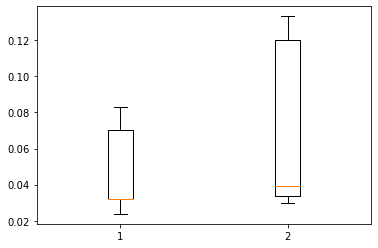

In [31]:
# a) Training and validation NRMSE obtained using pseudo inverse with number of training samples

sample=np.array([500,1000,1500,2000,2500])
NRMSE=np.zeros([sample.shape[0],2])
for i in range(sample.shape[0]):
    samp=sample[i]
    weight1,w0_bias,v_noise,data=gen_input(samp,dimension=6)
    target=gen_dep(data,weight1,w0_bias,v_noise)
    
    train_tar_set=target[0:np.int32(np.round(0.75*target.shape[0])),:]
    val_tar_set=target[np.int32(np.round(0.75*target.shape[0]))+1:np.int32(np.round(0.85*target.shape[0])),:]
    train_set=data[0:np.int32(np.round(0.75*data.shape[0])),:]
    val_set=data[np.int32(np.round(0.75*data.shape[0]))+1:np.int32(np.round(0.85*data.shape[0])),:]
    
    weight,predicted_y,mean_sq_error=Pinv_w_est (train_set,train_tar_set,lamb=0)
    NRMSE[i,0]=np.sqrt(mean_sq_error)/(np.max(train_tar_set)-np.min(train_tar_set))
    
    new_y=Linear_prediction(val_set,weight,bias=0)
    NRMSE[i,1]=np.sqrt(MSE(new_y,val_tar_set))/(np.max(val_tar_set)-np.min(val_tar_set))
    
    del weight1,w0_bias,v_noise,data,weight,predicted_y,mean_sq_error
print(NRMSE)
plt.boxplot(NRMSE)

### Comments [a]:
Number of samples have always been an important factor on accuracy of the model but also sometimes can cause poor accuracy due to presence of outliers. In the present case the accuracy is good when number of samples are 500 but decreases when it increases and again decreases. As we are generating numbers randomly the more number we are generating can increase the outliers but as the number of samples are much more higher then the difference between the numbers also decreases and the number of outliers will decrease. The model fitting is good in case of samples [500,2000,2500] but has overfitting in case of [1000,1500].

[[0.14278325 0.14165757]
 [0.06960297 0.07159643]
 [0.08298289 0.10047682]
 [0.04413481 0.04587982]
 [0.05713292 0.06513163]]


{'whiskers': [<matplotlib.lines.Line2D at 0x15f3d6a61c0>,
 'caps': [<matplotlib.lines.Line2D at 0x15f3d6a6760>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f3d695eb0>,
 'medians': [<matplotlib.lines.Line2D at 0x15f3d6a6d00>,
 'fliers': [<matplotlib.lines.Line2D at 0x15f3d6a6fd0>,
 'means': []}

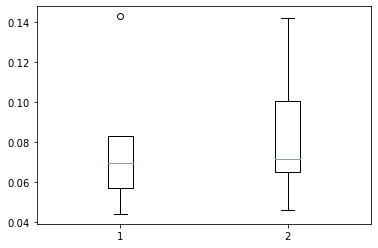

In [32]:
# b) Training and validation NRMSE obtained using pseudo inverse with number of variables [2]
Dimension=np.array([2,5,10,15,20])
NRMSE=np.zeros([Dimension.shape[0],2])
for i in range(Dimension.shape[0]):
    
    sample=1000
    weight1,w0_bias,v_noise,data=gen_input(sample,Dimension[i])
    target=gen_dep(data,weight1,w0_bias,v_noise)
    
    train_tar_set=target[0:np.int32(np.round(0.75*target.shape[0])),:]
    val_tar_set=target[np.int32(np.round(0.75*target.shape[0]))+1:np.int32(np.round(0.85*target.shape[0])),:]
    train_set=data[0:np.int32(np.round(0.75*data.shape[0])),:]
    val_set=data[np.int32(np.round(0.75*data.shape[0]))+1:np.int32(np.round(0.85*data.shape[0])),:]
    
    # estimation of the weight and prediction for training data
    weight,predicted_y,mean_sq_error=Pinv_w_est (train_set,train_tar_set,lamb=0)
    NRMSE[i,0]=np.sqrt(mean_sq_error)/(np.max(train_tar_set)-np.min(train_tar_set))
    
    # estimation of the weight and prediction for validation data
    weight2,predicted_y2,mean_sq_error2=Pinv_w_est (val_set,val_tar_set,lamb=0)
    NRMSE[i,1]=np.sqrt(mean_sq_error2)/(np.max(val_tar_set)-np.min(val_tar_set))
    
    
    del weight1,w0_bias,v_noise,data,weight,predicted_y,mean_sq_error
print(NRMSE)
plt.boxplot(NRMSE)

### Comment [b]:
Number of dimensions is also an important factor on accuracy of the model. Here the accuracy increases till some level and again it decreases for a higher number of dimensions. 


[[0.06050463 0.07155546]
 [0.06579229 0.08142298]
 [0.08666426 0.13186963]
 [0.0614565  0.06929015]
 [0.03461024 0.04874586]]


{'whiskers': [<matplotlib.lines.Line2D at 0x15f3d725130>,
 'caps': [<matplotlib.lines.Line2D at 0x15f3d7255b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f3d718e20>,
 'medians': [<matplotlib.lines.Line2D at 0x15f3d725b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x15f3d725e20>,
 'means': []}

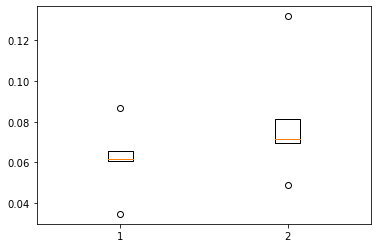

In [33]:
# c) Training and validation NRMSE obtained using pseudo inverse with noise variance [2]
Dimension=np.array([2,5,10,15,20])
NRMSE=np.zeros([Dimension.shape[0],2])
for i in range(Dimension.shape[0]):
    
    sample=1000
    weight1,w0_bias,v_noise,data=gen_input(sample,Dimension[i])
    target=gen_dep(data,weight1,w0_bias,v_noise)
    
    train_tar_set=target[0:np.int32(np.round(0.75*target.shape[0])),:]
    val_tar_set=target[np.int32(np.round(0.75*target.shape[0]))+1:np.int32(np.round(0.85*target.shape[0])),:]
    train_set=data[0:np.int32(np.round(0.75*data.shape[0])),:]
    val_set=data[np.int32(np.round(0.75*data.shape[0]))+1:np.int32(np.round(0.85*data.shape[0])),:]
    
    # estimation of the weight and prediction for training data
    weight,predicted_y,mean_sq_error=Pinv_w_est (train_set,train_tar_set,lamb=0)
    NRMSE[i,0]=np.sqrt(mean_sq_error)/(np.max(train_tar_set)-np.min(train_tar_set))
    
    # estimation of the weight and prediction for validation data
    weight2,predicted_y2,mean_sq_error2=Pinv_w_est (val_set,val_tar_set,lamb=0)
    NRMSE[i,1]=np.sqrt(mean_sq_error2)/(np.max(val_tar_set)-np.min(val_tar_set))
    
    
    del weight1,w0_bias,v_noise,data,weight,predicted_y,mean_sq_error
print(NRMSE)
plt.boxplot(NRMSE)

In [34]:
# d) Training and validation NRMSE obtained using pseudo inverse with w0 [2]

NRMSE=np.zeros([1,2])
    
    
weight1,w0_bias,v_noise,data=gen_input(sample=1000,dimension=20)

# adding a column of all ones to data for calculating the w0:
data1=np.concatenate((np.ones([data.shape[0],1]),data),axis=1)

#Calculating the target values
target=gen_dep(data,weight1,w0_bias,v_noise)

#splitting the data into training and validation
train_tar_set=target[0:np.int32(np.round(0.75*target.shape[0])),:]
val_tar_set=target[np.int32(np.round(0.75*target.shape[0]))+1:np.int32(np.round(0.85*target.shape[0])),:]
train_set=data1[0:np.int32(np.round(0.75*data1.shape[0])),:]
val_set=data1[np.int32(np.round(0.75*data1.shape[0]))+1:np.int32(np.round(0.85*data1.shape[0])),:]
    
# estimation of the weight and prediction for training data
weight,predicted_y,mean_sq_error=Pinv_w_est (train_set,train_tar_set,lamb=0)
NRMSE[0,0]=np.sqrt(mean_sq_error)/(np.max(train_tar_set)-np.min(train_tar_set))
    
# estimation of the weight and prediction for validation data
weight2,predicted_y2,mean_sq_error2=Pinv_w_est (val_set,val_tar_set,lamb=0)
NRMSE[0,1]=np.sqrt(mean_sq_error2)/(np.max(val_tar_set)-np.min(val_tar_set))
print (NRMSE)


[[0.01978648 0.02703803]]


### Comments [d]:
Including W0 on weight calculation has a huge impact on accuracy of the model. On previous analysis the NRMSE has never reached to 0.019 for training and 0.027 for validation data even though we have changed the number of samples and dimensions.

In [57]:
# e) Training and validation NRMSE obtained using pseudo inverse with lambda2 [2]
NRMSE=np.zeros([1,2])
    
    
weight1,w0_bias,v_noise,data=gen_input(sample=1500,dimension=5)

# adding a column of all ones to data for calculating the w0:
data1=np.concatenate((np.ones([data.shape[0],1]),data),axis=1)

#Calculating the target values
target=gen_dep(data,weight1,w0_bias,v_noise)

#splitting the data into training and validation
train_tar_set=target[0:np.int32(np.round(0.75*target.shape[0])),:]
val_tar_set=target[np.int32(np.round(0.75*target.shape[0]))+1:np.int32(np.round(0.85*target.shape[0])),:]
train_set=data1[0:np.int32(np.round(0.75*data1.shape[0])),:]
val_set=data1[np.int32(np.round(0.75*data1.shape[0]))+1:np.int32(np.round(0.85*data1.shape[0])),:]
    
# estimation of the weight and prediction for training data
weight,predicted_y,mean_sq_error=Pinv_w_est (train_set,train_tar_set,lamb=10)
NRMSE[0,0]=np.sqrt(mean_sq_error)/(np.max(train_tar_set)-np.min(train_tar_set))
    
# estimation of the weight and prediction for validation data
weight2,predicted_y2,mean_sq_error2=Pinv_w_est (val_set,val_tar_set,lamb=10)
NRMSE[0,1]=np.sqrt(mean_sq_error2)/(np.max(val_tar_set)-np.min(val_tar_set))
print (NRMSE)

[[0.04573049 0.05401633]]


### Comments [e]:
Including Lambda always not cause the increase of accuracy but sometimes can cause an increase to MSE value as in the case shown above. The NRMSE value has increased than the case without Lambda. 

In [36]:
# f) Time taken to solve pseudo inverse with number of samples and number of variables and its breaking points [2]

# We have to import the time library to calcukate the time taken by the funtion
import time


# Generate a range of data sets with varying numbers of samples and variables
samples = [10, 100, 1000, 10000]
dimension = [10, 100, 1000, 10000]

# Initialize an empty list to store the time taken for each calculation
time_taken = []

# Loop through the data sets and calculate the pseudo inverse
for s in samples:
    for d in dimension:
        weight1,w0_bias,v_noise,data=gen_input(s,d)
        target=gen_dep(data,weight1,w0_bias,v_noise)
        start_time = time.time()
        weight,predicted_y,mean_sq_error=Pinv_w_est (data,target,lamb=0.1)
        end_time = time.time()
        time_taken.append((s, d, end_time - start_time))

# Print the time taken for each calculation
print(time_taken)





[(10, 10, 0.0009980201721191406), (10, 100, 0.05186104774475098), (10, 1000, 0.2184162139892578), (10, 10000, 371.92160415649414), (100, 10, 0.0009975433349609375), (100, 100, 0.05147266387939453), (100, 1000, 0.21442222595214844), (100, 10000, 367.3194601535797), (1000, 10, 0.000997304916381836), (1000, 100, 0.001997232437133789), (1000, 1000, 0.24335241317749023), (1000, 10000, 374.438360452652), (10000, 10, 0.0), (10000, 100, 0.05395793914794922), (10000, 1000, 0.2982017993927002), (10000, 10000, 385.43973994255066)]


### Comments [f]:
Time taken to solve a problem using pseudo inverse is affected highly by the number of features and slightly affected by the number of samples. The breaking point for the case above is 10X10000 which takes a computing time of 371 sec. 

{'whiskers': [<matplotlib.lines.Line2D at 0x15f3c4e8460>,
 'caps': [<matplotlib.lines.Line2D at 0x15f3c4e8a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f3c4e8190>,
 'medians': [<matplotlib.lines.Line2D at 0x15f3c4e8fa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x15f3c4f32b0>,
 'means': []}

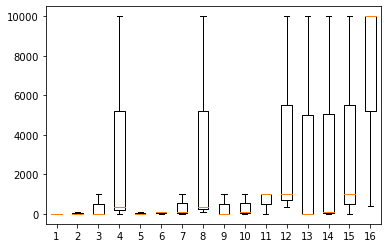

In [37]:
plt.boxplot(time_taken)

In [38]:
# g) Training and validation NRMSE obtained using gradient descent with max_iter [2]
max_iter=np.array([5,10,100,500,1000,1500,2000])
NRMSE=np.zeros([max_iter.shape[0],2])
for i in range(max_iter.shape[0]):
    
    # because of avoiding "SyntaxError: positional argument follows keyword argument" we have to predefine the value of 
    # max_iteration and store it in another value. While calling the function we can simply put max_iter=maxit
    maxit=max_iter[i]
    
    # Generating the weight, bias, noise and data
    weight1,w0_bias,v_noise,data=gen_input(sample=1000,dimension=20)
    target=gen_dep(data,weight1,w0_bias,v_noise)
    
    #splitting the data into training and validation
    train_tar_set=target[0:np.int32(np.round(0.75*target.shape[0])),:]
    val_tar_set=target[np.int32(np.round(0.75*target.shape[0]))+1:np.int32(np.round(0.85*target.shape[0])),:]
    train_set=data[0:np.int32(np.round(0.75*data.shape[0])),:]
    val_set=data[np.int32(np.round(0.75*data.shape[0]))+1:np.int32(np.round(0.85*data.shape[0])),:]
    
    # estimation of the weight and prediction for training data
    weight,predicted_y,NRMSE1=linear_reg_w(train_set,train_tar_set,lam2=0, lam1=0,eta=0.0001, max_iter=maxit, min_change_NRMSE=1e-6)
    NRMSE[i,0]=NRMSE1
    
    # estimation of the weight and prediction for validation data
    weight2,predicted_y2,NRMSE2=linear_reg_w(val_set,val_tar_set,lam2=0, lam1=0,eta=0.0001, max_iter=maxit, min_change_NRMSE=1e-6)
    NRMSE[i,1]=NRMSE2
    
    
    del weight1,w0_bias,v_noise,data,weight,predicted_y,NRMSE1,NRMSE2,maxit
print(NRMSE)

[[0.16592564 0.25429432]
 [0.17164651 0.20610108]
 [0.14715312 0.1532433 ]
 [0.11920168 0.19905647]
 [0.15285858 0.18009218]
 [0.11878771 0.15449159]
 [0.10256524 0.13363059]]


### Comments [g]:
Number of iterations has in-direct impact on NRMSE value of the model. As the iteration values increases the NRMSE values decreases and the accuracy increases. Also for higher number of iterations the fitting of the model gets better and accuracy of training and validation test get closer to each otehr. 


In [39]:
# h) Training and validation NRMSE obtained using gradient descent with eta [2]
eta=np.array([0.1,0.001,0.0001,0.00001,0.000001,0.0000001])
NRMSE=np.zeros([eta.shape[0],2])
for i in range(eta.shape[0]):
    
    # because of avoiding "SyntaxError: positional argument follows keyword argument" we have to predefine the value of 
    # max_iteration and store it in another value. While calling the function we can simply put et=eta[i]
    et=eta[i]
    
    # Generating the weight, bias, noise and data
    weight1,w0_bias,v_noise,data=gen_input(sample=1000,dimension=4)
    target=gen_dep(data,weight1,w0_bias,v_noise)
    
    #splitting the data into training and validation
    train_tar_set=target[0:np.int32(np.round(0.75*target.shape[0])),:]
    val_tar_set=target[np.int32(np.round(0.75*target.shape[0]))+1:np.int32(np.round(0.85*target.shape[0])),:]
    train_set=data[0:np.int32(np.round(0.75*data.shape[0])),:]
    val_set=data[np.int32(np.round(0.75*data.shape[0]))+1:np.int32(np.round(0.85*data.shape[0])),:]
    
    # estimation of the weight and prediction for training data
    weight,predicted_y,NRMSE1=linear_reg_w(train_set,train_tar_set,lam2=0, lam1=0,eta=et, max_iter=1500, min_change_NRMSE=1e-6)
    NRMSE[i,0]=NRMSE1
    
    # estimation of the weight and prediction for validation data
    weight2,predicted_y2,NRMSE2=linear_reg_w(val_set,val_tar_set,lam2=0, lam1=0,eta=et, max_iter=1500, min_change_NRMSE=1e-6)
    NRMSE[i,1]=NRMSE2
    
    
    del weight1,w0_bias,v_noise,data,weight,predicted_y,NRMSE1,NRMSE2,et
print(NRMSE)

[[0.05291556 0.06469915]
 [0.06916322 0.07339245]
 [0.17087182 0.18567415]
 [0.24239175 0.25040225]
 [0.06709947 0.08223507]
 [0.24387213 0.33707184]]


### Comments [h]:
The eta value or learning rate can impact the NRMSE value but is also dependent on number of max iterations. We cannot find the optimal number of eta or max iteration independent of each other. As, I run the code in "h" section for different number of max iterations I got different eta values for optimal NRMSE. So, I used the optimal number of max iterations we found in section "g" and in that case the optimal eta=0.1. As the eta values decrease the NRMSE values increase and then decrease. But the different with optimal eta is high. 

In [41]:
# i) Time taken to solve gradient descent with number of samples and number of variables and its breaking points [2]

# Generate a range of data sets with varying numbers of samples and variables
samples = [10, 100, 1000, 10000,100000,1000000]
dimension = [10, 100, 1000, 10000,100000]

# Initialize an empty list to store the time taken for each calculation
time_taken = []

# Loop through the data sets and calculate the gradient descent
for s in samples:
    for d in dimension:
        weight1,w0_bias,v_noise,data=gen_input(s,d)
        target=gen_dep(data,weight1,w0_bias,v_noise)
        start_time = time.time()
        weight,predicted_y,NRMSE1=linear_reg_w(train_set,train_tar_set,lam2=0, lam1=0,eta=0.0001, max_iter=1000,
                                               min_change_NRMSE=1e-6)
        end_time = time.time()
        time_taken.append((s, d, end_time - start_time))

# Print the time taken for each calculation
print(time_taken)


MemoryError: Unable to allocate 745. GiB for an array with shape (1000000, 100000) and data type float64

In [43]:
# j) Time taken to solve gradient descent with number of variables and its breaking point [2]

# specify the number of different variables
dimension = [10, 100, 1000, 10000,100000,1000000]

# Initialize an empty list to store the time taken for each calculation
time_taken = []

# Loop through the data sets and calculate the gradient descent
for d in dimension:
    weight1,w0_bias,v_noise,data=gen_input(10000,d)
    target=gen_dep(data,weight1,w0_bias,v_noise)
    start_time = time.time()
    weight,predicted_y,NRMSE1=linear_reg_w(train_set,train_tar_set,lam2=0, lam1=0,eta=0.0001, max_iter=1000,
                                            min_change_NRMSE=1e-6)
    end_time = time.time()
    time_taken.append((s, d, end_time - start_time))

# Print the time taken for each calculation
print(time_taken)



[(1000000, 10, 0.04288601875305176), (1000000, 100, 0.05186104774475098), (1000000, 1000, 0.054852962493896484), (1000000, 10000, 0.041886329650878906), (1000000, 100000, 0.04288673400878906), (1000000, 1000000, 0.10372328758239746)]


In [44]:
# k) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda2 [2]

lamb_two=np.array([0.01,0.1,1,10,100])
NRMSE=np.zeros([lamb_two.shape[0],2])
for i in range(lamb_two.shape[0]):
    
    # because of avoiding "SyntaxError: positional argument follows keyword argument" we have to predefine the value of 
    # max_iteration and store it in another value. While calling the function we can simply put et=eta[i]
    lam=lamb_two[i]
    
    # Generating the weight, bias, noise and data
    weight1,w0_bias,v_noise,data=gen_input(sample=1000,dimension=4)
    target=gen_dep(data,weight1,w0_bias,v_noise)
    
    #splitting the data into training and validation
    train_tar_set=target[0:np.int32(np.round(0.75*target.shape[0])),:]
    val_tar_set=target[np.int32(np.round(0.75*target.shape[0]))+1:np.int32(np.round(0.85*target.shape[0])),:]
    train_set=data[0:np.int32(np.round(0.75*data.shape[0])),:]
    val_set=data[np.int32(np.round(0.75*data.shape[0]))+1:np.int32(np.round(0.85*data.shape[0])),:]
    
    # estimation of the weight and prediction for training data
    weight,predicted_y,NRMSE1=linear_reg_w(train_set,train_tar_set,lam2=lam, lam1=0,eta=0.001, max_iter=1000, min_change_NRMSE=1e-6)
    NRMSE[i,0]=NRMSE1
    
    # estimation of the weight and prediction for validation data
    weight2,predicted_y2,NRMSE2=linear_reg_w(val_set,val_tar_set,lam2=lam, lam1=0,eta=0.001, max_iter=1000, min_change_NRMSE=1e-6)
    NRMSE[i,1]=NRMSE2
    
    
    del weight1,w0_bias,v_noise,data,weight,predicted_y,NRMSE1,NRMSE2,lam


# Counting number of NRMSE values which is closer to zero. In this case any number which is smaller than 0.1, we will
# cosider it as closer to zero
countt=np.zeros([1,2])
countt[0,0]=np.count_nonzero(NRMSE[:,0]<0.1)
countt[0,1]=np.count_nonzero(NRMSE[:,1]<0.1)
print (countt)
 

[[1. 0.]]


In [45]:
#l) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda1 [2]

lamb_one=np.array([0.01,0.1,1,10,100])
NRMSE=np.zeros([lamb_one.shape[0],2])
for i in range(lamb_one.shape[0]):
    
    # because of avoiding "SyntaxError: positional argument follows keyword argument" we have to predefine the value of 
    # max_iteration and store it in another value. While calling the function we can simply put et=eta[i]
    lam=lamb_one[i]
    
    # Generating the weight, bias, noise and data
    weight1,w0_bias,v_noise,data=gen_input(sample=1000,dimension=4)
    target=gen_dep(data,weight1,w0_bias,v_noise)
    
    #splitting the data into training and validation
    train_tar_set=target[0:np.int32(np.round(0.75*target.shape[0])),:]
    val_tar_set=target[np.int32(np.round(0.75*target.shape[0]))+1:np.int32(np.round(0.85*target.shape[0])),:]
    train_set=data[0:np.int32(np.round(0.75*data.shape[0])),:]
    val_set=data[np.int32(np.round(0.75*data.shape[0]))+1:np.int32(np.round(0.85*data.shape[0])),:]
    
    # estimation of the weight and prediction for training data
    weight,predicted_y,NRMSE1=linear_reg_w(train_set,train_tar_set,lam2=0, lam1=lam,eta=0.001, max_iter=1000, min_change_NRMSE=1e-6)
    NRMSE[i,0]=NRMSE1
    
    # estimation of the weight and prediction for validation data
    weight2,predicted_y2,NRMSE2=linear_reg_w(val_set,val_tar_set,lam2=0, lam1=lam,eta=0.001, max_iter=1000, min_change_NRMSE=1e-6)
    NRMSE[i,1]=NRMSE2
    
    
    del weight1,w0_bias,v_noise,data,weight,predicted_y,NRMSE1,NRMSE2,lam


# Counting number of NRMSE values which is closer to zero. In this case any number which is smaller than 0.001, we will
# cosider it as closer to zero
countt=np.zeros([1,2])
countt[0,0]=np.count_nonzero(NRMSE[:,0]<0.1)
countt[0,1]=np.count_nonzero(NRMSE[:,1]<0.1)
print (countt)


[[3. 3.]]


In [46]:
# m) Training and validation NRMSE for optimal lambda2 with noise variance [2]

# Re-writing the function of gradient descent with variance

def linear_reg_noise(dt,t,noise, eta, max_iter, min_change_NRMSE,lam2, lam1):
    n, d = dt.shape
    weight = np.ones([d,1])
    for i in range(max_iter):
        y = dt.dot(weight)+noise
        grad = (dt.T @ (y - t))/dt.shape[0] + lam2 * np.square(weight)  + lam1 * np.abs(weight)
        weight -= eta * grad
        NRMSE = np.sqrt(np.mean(np.square(y - t))) / (np.max(t) - np.min(t))
        if NRMSE < min_change_NRMSE:
            break
    return weight,y, NRMSE

C:\Users\IIT BOMBAY\AppData\Local\Temp\ipykernel_2752\2083073867.py:10: RuntimeWarning: overflow encountered in square
  grad = (dt.T @ (y - t))/dt.shape[0] + lam2 * np.square(weight)  + lam1 * np.abs(weight)
C:\Users\IIT BOMBAY\AppData\Local\Temp\ipykernel_2752\2083073867.py:12: RuntimeWarning: overflow encountered in square
  NRMSE = np.sqrt(np.mean(np.square(y - t))) / (np.max(t) - np.min(t))
C:\Users\IIT BOMBAY\AppData\Local\Temp\ipykernel_2752\2083073867.py:10: RuntimeWarning: invalid value encountered in multiply
  grad = (dt.T @ (y - t))/dt.shape[0] + lam2 * np.square(weight)  + lam1 * np.abs(weight)


[[0.12334023]
 [0.12333478]
 [0.12328527]
 [0.12279848]
 [0.11868472]
 [0.1118667 ]
 [0.1461382 ]
 [0.16954201]
 [0.17870773]
 [       nan]
 [       nan]]


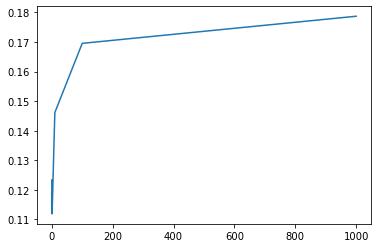

In [47]:
#finding the optimal lambda 2 value
lambda2=np.array([0.000001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000])
NRMSE=np.zeros([lambda2.shape[0],1])

# Generating the weight, bias, noise and data
weight1,w0_bias,v_noise,data=gen_input(sample=1000,dimension=4)
target=gen_dep(data,weight1,w0_bias,v_noise)

for i in range(lambda2.shape[0]):
    lamm=lambda2[i]
    w,y,NRMSE[i,0]=linear_reg_noise(data,target,v_noise, eta=0.001, max_iter=1000, min_change_NRMSE=0.005,lam2=lamm, lam1=0)
    del w,y
print(NRMSE)
np.where(NRMSE==min(NRMSE))
plt.plot(lambda2,NRMSE)

In [48]:
# the optimal lambda2 for the case above is 1000. so, we take lambda 2 as 1000. 

NRMSE=np.zeros([1,2])    
    
#splitting the data into training and validation
train_tar_set=target[0:np.int32(np.round(0.75*target.shape[0])),:]
val_tar_set=target[np.int32(np.round(0.75*target.shape[0]))+1:np.int32(np.round(0.85*target.shape[0])),:]
train_set=data[0:np.int32(np.round(0.75*data.shape[0])),:]
val_set=data[np.int32(np.round(0.75*data.shape[0]))+1:np.int32(np.round(0.85*data.shape[0])),:]
    
# estimation of the weight and prediction for training data
weight,predicted_y,NRMSE1=linear_reg_noise(train_set,train_tar_set,noise[:750,:], eta=0.001, max_iter=1000, min_change_NRMSE=0.005,lam2=1, lam1=0)
NRMSE[0,0]=NRMSE1
    
# estimation of the weight and prediction for validation data
weight2,predicted_y2,NRMSE2=linear_reg_noise(val_set,val_tar_set,noise[750:849,:], eta=0.001, max_iter=1000, min_change_NRMSE=0.005,lam2=1, lam1=0)
NRMSE[0,1]=NRMSE2
    
    
del weight1,w0_bias,v_noise,data,weight,predicted_y,NRMSE1,NRMSE2
print(NRMSE)

[[0.13318921 0.13695542]]


[[0.12628834]
 [0.12628206]
 [0.12622503]
 [0.12566399]
 [0.12094905]
 [0.12520782]
 [0.1869219 ]
 [0.19800059]
 [       nan]
 [       nan]
 [       nan]]


C:\Users\IIT BOMBAY\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\IIT BOMBAY\AppData\Local\Temp\ipykernel_2752\2083073867.py:12: RuntimeWarning: overflow encountered in square
  NRMSE = np.sqrt(np.mean(np.square(y - t))) / (np.max(t) - np.min(t))
C:\Users\IIT BOMBAY\AppData\Local\Temp\ipykernel_2752\2083073867.py:10: RuntimeWarning: overflow encountered in square
  grad = (dt.T @ (y - t))/dt.shape[0] + lam2 * np.square(weight)  + lam1 * np.abs(weight)
C:\Users\IIT BOMBAY\AppData\Local\Temp\ipykernel_2752\2083073867.py:10: RuntimeWarning: invalid value encountered in multiply
  grad = (dt.T @ (y - t))/dt.shape[0] + lam2 * np.square(weight)  + lam1 * np.abs(weight)


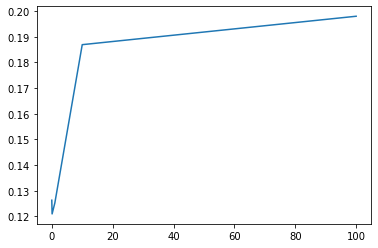

In [49]:
# n) Training and validation NRMSE for optimal lambda1 with noise variance [2]

#finding the optimal lambda 2 value
lambda1=np.array([0.000001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000])
NRMSE=np.zeros([lambda1.shape[0],1])

# Generating the weight, bias, noise and data
weight1,w0_bias,v_noise,data=gen_input(sample=1000,dimension=4)
target=gen_dep(data,weight1,w0_bias,v_noise)

for i in range(lambda2.shape[0]):
    lamm=lambda1[i]
    w,y,NRMSE[i,0]=linear_reg_noise(data,target,v_noise, eta=0.001, max_iter=1000, min_change_NRMSE=0.005,lam2=0, lam1=lamm)
    del w,y
print(NRMSE)
plt.plot(lambda1,NRMSE)


In [50]:
# the optimal lambda1 for the case above is 0.1. so, we take lambda 2 as 1000. 

NRMSE=np.zeros([1,2])    
    
#splitting the data into training and validation
train_tar_set=target[0:np.int32(np.round(0.75*target.shape[0])),:]
val_tar_set=target[np.int32(np.round(0.75*target.shape[0]))+1:np.int32(np.round(0.85*target.shape[0])),:]
train_set=data[0:np.int32(np.round(0.75*data.shape[0])),:]
val_set=data[np.int32(np.round(0.75*data.shape[0]))+1:np.int32(np.round(0.85*data.shape[0])),:]
    
# estimation of the weight and prediction for training data
weight,predicted_y,NRMSE1=linear_reg_noise(train_set,train_tar_set,noise[:750,:], eta=0.001, max_iter=1000, min_change_NRMSE=0.005,lam2=0, lam1=0.1)
NRMSE[0,0]=NRMSE1
    
# estimation of the weight and prediction for validation data
weight2,predicted_y2,NRMSE2=linear_reg_noise(val_set,val_tar_set,noise[750:849,:], eta=0.001, max_iter=1000, min_change_NRMSE=0.005,lam2=0, lam1=0.1)
NRMSE[0,1]=NRMSE2
    
    
del weight1,w0_bias,v_noise,data,weight,predicted_y,NRMSE1,NRMSE2
print(NRMSE)

[[0.14084925 0.17153129]]


In [51]:
# o) Experiment (f) but, this time with number of training samples and number of variables [2]

# Generate a range of data sets with varying numbers of samples and variables

samples = [10, 100, 1000, 10000,100000,1000000]
dimension = [10, 100, 1000, 10000,100000,1000000]

# Initialize an empty list to store the time taken for each calculation
time_taken = []

# Loop through the data sets and calculate the gradient descent
for s in samples:
    for d in dimension:
        weight1,w0_bias,v_noise,data=gen_input(s,d)
        target=gen_dep(data,weight1,w0_bias,v_noise)
        start_time = time.time()
        weight,predicted_y,NRMSE1=linear_reg_w(train_set,train_tar_set,lam2=0, lam1=0,eta=0.0001, max_iter=1000,
                                               min_change_NRMSE=1e-6)
        end_time = time.time()
        time_taken.append((s, d, end_time - start_time))

# Print the time taken for each calculation
print(time_taken)

MemoryError: Unable to allocate 745. GiB for an array with shape (100000, 1000000) and data type float64

# Overall understanding:
using a function and understanding a function specially writing a function is totally different. I have used linear regression functions earlier in other problems which was available in libraries but this time my understanding from linear regression was much more deeper and it was a very good experience for me to first understand the mathematics behind all these models and then code them in Python. Now I am very confident about linear regression, gradient descent, pseudo inverse and regularization concepts. 

According to the analysis done in the above assignment Pseudo-inverse method was working better than Gradient-descent method in my case, while in can be not correct in general. Including W0 in the weight calculation of Pseudo-inverse method has a huge impact on accuracy of the method and it increases significantly. 